# Neural Network experiments

Contains misc experiments with constrained networks

Start code

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import initializers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import load_model
import tensorflow as tf
import time
import keras
from math import log
print(keras.__version__)
%tensorflow_version 2.x
%matplotlib inline 
from sklearn.utils import shuffle

2.4.3


Load dataset

In [ ]:
# load and prepare dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32').reshape((x_train.shape[0], 28, 28))
x_test = x_test.astype('float32').reshape((x_test.shape[0], 28, 28))
print('x_train: ', x_train.shape)

x_train /= 255
x_test /= 255

num_rows = 28
num_cols = 28
num_channels = 1
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train:  (60000, 28, 28)


Double masks


In [ ]:
double = np.concatenate((x_train[0],x_train[1]),axis=1)
double_mask = np.concatenate((np.ones((28,28)), np.zeros((28,28))), axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(double)
ax2.imshow(double_mask)

Model code

In [ ]:
# Here we define our model as a sequential neural network
def get_model():
  model = Sequential()
  model.add(Input(shape=(28, 28, 1)))
  model.add(Flatten())
  # model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='random_uniform',
  #                     bias_initializer=initializers.Constant(0.1)))
  # model.add(Activation('relu'))

  # model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='random_uniform',
  #                     bias_initializer=initializers.Constant(0.1)))
  # model.add(Activation('relu'))

  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Flatten())
  # model.add(Dense(256, kernel_initializer='random_uniform',
  #                     bias_initializer=initializers.Constant(0.1)))
  # model.add(Activation('relu'))
  model.add(Dense(512, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))
  model.add(Dense(512, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(10,))
  # model.add(Activation('softmax'))

  return model

def calc_acc(model_name, data, test_set):
  preds = model_name.predict(data)
  score = 0
  for i in range(len(data)):
    pred = preds[i]
    target = test_set[i]
    if np.argmax(pred) == np.argmax(target):
      score += 1

  print("Acc:", score, 'of', len(x_test))
  return score/len(x_test)

model = get_model()
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=optimizer, metrics=[tf.keras.metrics.MeanSquaredError()])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_24 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)              

Denoising Mnist code

In [ ]:
# create noisy_mnist dataset
noisy_mnist = x_train.copy()
noisy_mnist += np.random.normal(0.05, 0.05, noisy_mnist.shape)

# create noisy data
n = 60000
for i in range(n):
  if i % 1000 == 0 and i > 1000:
    print(i,'/', i/600, '%')
  image = noisy_mnist[i]
  for x in range(28):
    for y in range(28):
      if image[x][y] < 0:
        image[x][y] = 0
      if image[x][y] > 1:
        image[x][y] = 1

x = noisy_mnist[0:n]
y = x_train[0:n]

2000 / 3.3333333333333335 %
3000 / 5.0 %
4000 / 6.666666666666667 %
5000 / 8.333333333333334 %
6000 / 10.0 %
7000 / 11.666666666666666 %
8000 / 13.333333333333334 %
9000 / 15.0 %
10000 / 16.666666666666668 %
11000 / 18.333333333333332 %
12000 / 20.0 %
13000 / 21.666666666666668 %
14000 / 23.333333333333332 %
15000 / 25.0 %
16000 / 26.666666666666668 %
17000 / 28.333333333333332 %
18000 / 30.0 %
19000 / 31.666666666666668 %
20000 / 33.333333333333336 %
21000 / 35.0 %
22000 / 36.666666666666664 %
23000 / 38.333333333333336 %
24000 / 40.0 %
25000 / 41.666666666666664 %
26000 / 43.333333333333336 %
27000 / 45.0 %
28000 / 46.666666666666664 %
29000 / 48.333333333333336 %
30000 / 50.0 %
31000 / 51.666666666666664 %
32000 / 53.333333333333336 %
33000 / 55.0 %
34000 / 56.666666666666664 %
35000 / 58.333333333333336 %
36000 / 60.0 %
37000 / 61.666666666666664 %
38000 / 63.333333333333336 %
39000 / 65.0 %
40000 / 66.66666666666667 %
41000 / 68.33333333333333 %
42000 / 70.0 %
43000 / 71.666666666

In [ ]:
# training code
X = x.reshape(60000, 28, 28, 1)
Y = y.reshape(60000, 784,)

model.fit(X, Y, epochs=10, batch_size=32)

filename = 'latest_model.h5'
model.save(filename)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0509 - mean_squared_error: 0.0509
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0522 - mean_squared_error: 0.0522
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0521 - m

Display denoising model outputs

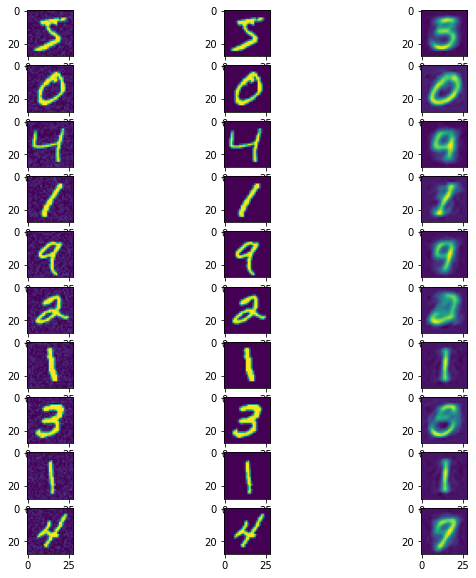

In [ ]:
# plot input, target, model output
f, axarr = plt.subplots(10, 3, figsize=(10, 10))
for i in range(10):
    axarr[i, 0].imshow(noisy_mnist[i])
    axarr[i, 1].imshow(x_train[i])
    axarr[i, 2].imshow(model.predict(noisy_mnist[i].reshape(1, 28, 28, 1)).reshape(28, 28))
plt.show()

Double Digit Test

2000 of 60000
3000 of 60000
4000 of 60000
5000 of 60000
6000 of 60000
7000 of 60000
8000 of 60000
9000 of 60000
10000 of 60000
11000 of 60000
12000 of 60000
13000 of 60000
14000 of 60000
15000 of 60000
16000 of 60000
17000 of 60000
18000 of 60000
19000 of 60000
20000 of 60000
21000 of 60000
22000 of 60000
23000 of 60000
24000 of 60000
25000 of 60000
26000 of 60000
27000 of 60000
28000 of 60000
29000 of 60000
30000 of 60000
31000 of 60000
32000 of 60000
33000 of 60000
34000 of 60000
35000 of 60000
36000 of 60000
37000 of 60000
38000 of 60000
39000 of 60000
40000 of 60000
41000 of 60000
42000 of 60000
43000 of 60000
44000 of 60000
45000 of 60000
46000 of 60000
47000 of 60000
48000 of 60000
49000 of 60000
50000 of 60000
51000 of 60000
52000 of 60000
53000 of 60000
54000 of 60000
55000 of 60000
56000 of 60000
57000 of 60000
58000 of 60000
59000 of 60000
(30000, 28, 56)
(30000, 2, 10)


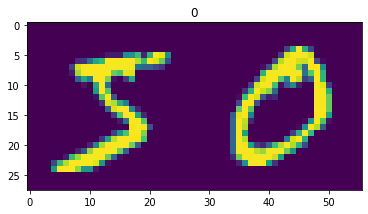

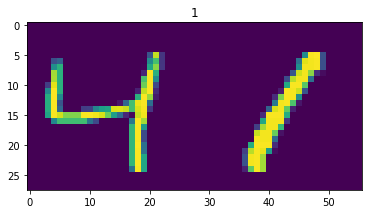

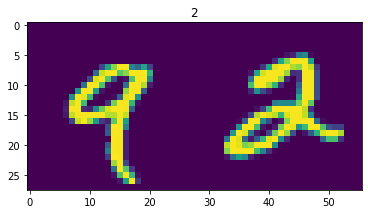

In [ ]:
im1 = x_train[0]
im2 = x_train[1]

joined_dataset = []
joined_labels = []

for i in range(0, 60000, 2):
  if i % 1000 == 0 and i > 1000:
    print(i, 'of 60000')
  im1 = x_train[i]
  im2 = x_train[i+1]
  label1 = y_train[i]
  label2 = y_train[i+1]

  joined_image = np.concatenate((im1, im2), axis=1)
  joined_label = np.array((label1, label2))

  joined_dataset.append(joined_image)
  joined_labels.append(joined_label)

joined_dataset = np.array(joined_dataset)
joined_labels = np.array(joined_labels)
print(joined_dataset.shape)
print(joined_labels.shape)

for i in range(3):
  plt.imshow(joined_dataset[i])
  plt.title(str(np.argmax(joined_labels[i][1])))
  plt.show()


# im3 = np.concatenate((im1, im2), axis=1)
# joined_dataset = np.concatenate((x_train[0:30000], x_train[30000:60000]), axis=2)
# i = 0
# i2 = i + 30000
# joined_labels = []
# for i in range(30000):
#   label = np.append(np.argmax(y_train[i]), np.argmax(y_train[i+30000]))
#   joined_labels.append(label)


Double MNIST models with extra input size

In [ ]:
# Here we define our model as a sequential neural network
def get_model():
  model = Sequential()
  model.add(Input(shape=(28, 56, 1)))

  model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dropout(0.2))

  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(10,))
  model.add(Activation('softmax'))

  return model

model = get_model()
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=optimizer, metrics=[tf.keras.metrics.MeanSquaredError()])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 54, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 52, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 52, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9984)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

Fc_mnist copied

In [ ]:
# Here we define our model as a sequential neural network
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))

  model.add(Dense(512, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(512, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

def calc_acc(model_name, data, test_set):
  preds = model_name.predict(data)
  score = 0
  for i in range(len(data)):
    pred = preds[i]
    target = test_set[i]
    if np.argmax(pred) == np.argmax(target):
      score += 1

  print("Acc:", score, 'of', len(x_test))
  return score/len(x_test)

model = get_model()
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_32 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_33 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_34 (Activation)   (None, 256)              

Normal training

In [ ]:
# training code
print(joined_dataset.shape)
X = joined_dataset.reshape(30000, 28, 56, 1)
Y = joined_labels[:, 1] # all RHS labels
print(Y.shape)

model.fit(X, Y, epochs=5, batch_size=32)

filename = 'latest_model.h5'
model.save(filename)

(30000, 28, 56)
(30000, 10)
Epoch 1/5
938/938 [==============================] - 109s 116ms/step - loss: 0.5304 - accuracy: 0.8907
Epoch 2/5
938/938 [==============================] - 109s 116ms/step - loss: 0.1092 - accuracy: 0.9689
Epoch 3/5
938/938 [==============================] - 108s 115ms/step - loss: 0.1124 - accuracy: 0.9701
Epoch 4/5
938/938 [==============================] - 108s 116ms/step - loss: 0.0952 - accuracy: 0.9765
Epoch 5/5
938/938 [==============================] - 109s 116ms/step - loss: 0.0875 - accuracy: 0.9791


Evaluation and Interpretation

In [ ]:
# model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=64)
def perform_SVD(X, model, target_layer, aux_model):
    # print(x.shape, x)
    # print(model.input.shape)
    # print('modelpred:', model.predict(x))
    X = tf.convert_to_tensor(X)
    # print(x)
    # print('tesnorpred:', model.predict(x))

    img_rows = 28
    img_cols = 28

    # feed in images and record activations
    print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    # neuron activations shape is (batch_size, neuron_size)
    # print(np.argmax(model.predict(x)), 'was the predicted class')
    # calculate gradients for each neuron w.r.t. input
    grad_maps = []
    print("Retrieving neuron gradients w.r.t. input")

    for neuron in neuron_activations:
        # local grad maps are (28, 28) images
        grad_maps.append(tape.gradient(neuron,X))

    grad_maps = np.array(grad_maps)
    print("Calculated grad_maps of shape:", grad_maps.shape)


    # numpyify the gradients and reshape tensors to get reduce unneeded dimensions
    grad_maps = grad_maps.reshape(len(X), n_neurons, img_rows * (28*2))
    X = X.numpy().reshape(len(X), (img_rows * (28*2)))

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    V_batch = []
    for i in range(len(X)):
      x = X[i]
      # compute w_hat, b_hat and V
      V = []
      for neuron in range(n_neurons):
          # switched weight vector
          w_hat = grad_maps[i][neuron]  # eq 4
          # switched bias vector
          b_hat = neuron_activations[i][neuron] - x * np.transpose(w_hat)  # eq 5

          v = w_hat * x + b_hat  # eq 2
          # note that this is equal to the neuron activation here but as a (28, 28) matrix?
          # v is a (28, 28) shape but almost all same value
          # ICD
          # many values are -inf or nan here?
          c_hat = x - np.dot(v / (np.dot(w_hat, np.transpose(w_hat))), w_hat)  # eq 9
          c_hat = np.nan_to_num(c_hat)
          v_hat = (x - c_hat) * w_hat  # eq 8

          # V.append(np.transpose(-c_hat*w_hat))  # eq 11
          # local_V.append(np.transpose(x*w_hat))
          V.append(np.transpose(v_hat))  # eq 11
      V_batch.append(V)

    # now we have calculated switched weight vectors for each neuron
    V = np.array(V_batch)
    V = V.transpose()
    #V -= np.mean(V)
    print('V shape after transpose before svd', V.shape)
    V = V.reshape(batch_size, 28*2*28, n_neurons)
    u = []
    s = []
    vh = []
    for i in range(len(X)):
      print("Performing SVD", i, 'of', len(X))
      u1, s1, vh1 = np.linalg.svd(V[i], full_matrices=False)  # eq 12
      u.append(u1)
      s.append(s1)
      vh.append(vh1)
    
    u = np.array(u)
    s = np.array(s)
    vh = np.array(vh)
    print('U shape before returning', u.shape)
    print(u.shape, s.shape, vh.shape)
    
    return u, s, vh

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 54, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 52, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 52, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9984)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

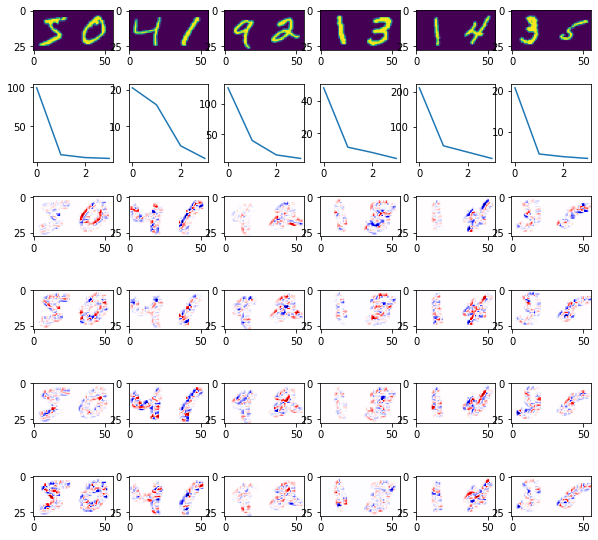

In [ ]:
from tensorflow.keras.models import load_model
# model = load_model('training_mask_2500_images_a=0.6169.h5')
# compare activation similarity
def get_activations(X, model, target_layer, aux_model):
    X = tf.convert_to_tensor(X)
 
    # feed in images and record activations
    print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    return neuron_activations

# calc_acc(model, x_test)
model.summary()
# model_normal = get_model()
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
# model_normal.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# n = 60000
# model_normal.fit(x_train.reshape(60000, 28, 28, 1), y_train, epochs=1)
# calc_acc(model_normal, x_test.reshape(10000, 28, 28, 1), y_test)
#img = add_noise(img)
batch_size = 1
target_layer = 11 # 9
n_neurons = model.layers[target_layer].output.shape[-1]
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=model.inputs,
                            outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])



# print('u shape', u.shape)
f, axarr = plt.subplots(6, 6, figsize=(10, 10))
for i in range(6):
  img = X[i:i+1].reshape(1, 28, 56, 1)
  print("pred'", np.argmax(model(img)))
  # img = img.reshape(1, 784)
  u, s, vh = perform_SVD(img, model, target_layer, aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  u = u[0]
  u = u.transpose()

  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i].imshow(img.reshape(28, 56))
  axarr[1, i].plot(s[0][0:4])
  axarr[2, i].imshow(u[0].reshape(28, 56), vmin=-1, vmax=1, cmap='seismic') # single neuron
  axarr[3, i].imshow(u[1].reshape(28, 56), vmin=-1, vmax=1, cmap='seismic')
  axarr[4, i].imshow(u[2].reshape(28, 56), vmin=-1, vmax=1, cmap='seismic')
  axarr[5, i].imshow(u[3].reshape(28, 56), vmin=-1, vmax=1, cmap='seismic')

  # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
plt.show()

# img = u[0].reshape(28, 28)

# plt.imshow(img, vmin=-1, vmax=1, cmap='seismic')
# plt.title("Digit: 2, Component:0")
# plt.show()

# img = u[1].reshape(28, 28)

# plt.imshow(img, vmin=-1, vmax=1, cmap='seismic')
# plt.title("Digit: 2, Component:1")
# plt.show()

# img = u[2].reshape(28, 28)

# plt.imshow(img, vmin=-1, vmax=1, cmap='seismic')
# plt.title("Digit: 2, Component:2")
# plt.show()


Extra interp code (this one might not be working)

In [ ]:
from tensorflow.keras.models import load_model
# model = load_model('training_mask_2500_images_a=0.6169.h5')
# compare activation similarity
def get_activations(X, model, target_layer, aux_model):
    X = tf.convert_to_tensor(X)
 
    # feed in images and record activations
    print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    return neuron_activations

# calc_acc(model, x_test)
model.summary()
# model_normal = get_model()
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
# model_normal.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# n = 60000
# model_normal.fit(x_train.reshape(60000, 28, 28, 1), y_train, epochs=1)
# calc_acc(model_normal, x_test.reshape(10000, 28, 28, 1), y_test)
#img = add_noise(img)
batch_size = 1
target_layer = 9 # 9
n_neurons = model.layers[target_layer].output.shape[-1]
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=model.inputs,
                            outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])



# # print('u shape', u.shape)
# f, axarr = plt.subplots(6, 6, figsize=(10, 10))
# for i in range(6):
#   img = X[i:i+1].reshape(1, 28, 56, 1)
#   print("pred'", np.argmax(model(img)))
#   # img = img.reshape(1, 784)
#   u, s, vh = perform_SVD(img, model, target_layer, aux_model)
#   print('U shape before transpose:', u.shape)
#   u = u.transpose()
#   print('U shape after transpose', u.shape)
#   print('s shape', s.shape)
#   u = u.transpose()
#   u = u[0]
#   u = u.transpose()

#   for component in u:
#     component /= np.max(np.abs(component))
#   axarr[0, i].imshow(img.reshape(28, 56))
#   axarr[1, i].plot(s[0][0:4])
#   axarr[2, i].imshow(u[0].reshape(28, 56), vmin=-1, vmax=1, cmap='seismic') # single neuron
#   axarr[3, i].imshow(u[1].reshape(28, 56), vmin=-1, vmax=1, cmap='seismic')
#   axarr[4, i].imshow(u[2].reshape(28, 56), vmin=-1, vmax=1, cmap='seismic')
#   axarr[5, i].imshow(u[3].reshape(28, 56), vmin=-1, vmax=1, cmap='seismic')

  # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
i = 0
img = x_train[i:i+1].reshape(1, 28, 28, 1)
print("pred'", np.argmax(model(img)))
# img = img.reshape(1, 784)
u, s, vh = perform_SVD(img, model, target_layer, aux_model)
print('U shape before transpose:', u.shape)
u = u.transpose()
print('U shape after transpose', u.shape)
print('s shape', s.shape)
u = u.transpose()
u = u[0]
u = u.transpose()

for component in u:
  component /= np.max(np.abs(component))
plt.imshow(u[0].reshape(28, 28))
plt.show()

# img = u[0].reshape(28, 28)

# plt.imshow(img, vmin=-1, vmax=1, cmap='seismic')
# plt.title("Digit: 2, Component:0")
# plt.show()

# img = u[1].reshape(28, 28)

# plt.imshow(img, vmin=-1, vmax=1, cmap='seismic')
# plt.title("Digit: 2, Component:1")
# plt.show()

# img = u[2].reshape(28, 28)

# plt.imshow(img, vmin=-1, vmax=1, cmap='seismic')
# plt.title("Digit: 2, Component:2")
# plt.show()
